<a href="https://colab.research.google.com/github/oscaredumurguia/Simulab/blob/main/Tarea2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea - Caminata aleatoria y simulación de apuestas

#### 1. Simulación del movimiento browniano

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido, como resultado de choques contra las moléculas de dicho fluido [(referencia)].

[(referencia)]: https://es.wikipedia.org/wiki/Movimiento_browniano

Para simular el movimiento, en lugar de usar las ecuaciones integro-diferenciales que describe Einstein, use una caminta aleatoria para los tres ejes $x$, $y$, $z$ de la siguiente forma
$$
W_i=W_{i-1}+X_i\sqrt{\Delta t}
$$
donde, $\Delta t=0.001$ es un intervalo de tiempo y
$$
X_i=\left\{\begin{array}{l}
1\\
-1
\end{array}\right.,
$$
se escoge de forma aleatoria con la misma probabilidad.

Simule tres caminatas con $10$ segundos (10000 pasos) y represéntelo en un gráfico 3D.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
delta_t = 0.001
N=10000
caminata=np.sqrt(delta_t)
dx=np.random.choice([-1,1],N)*caminata
dy=np.random.choice([-1,1],N)*caminata
dz=np.random.choice([-1,1],N)*caminata
x=np.cumsum(dx)
y=np.cumsum(dy)
z=np.cumsum(dz)

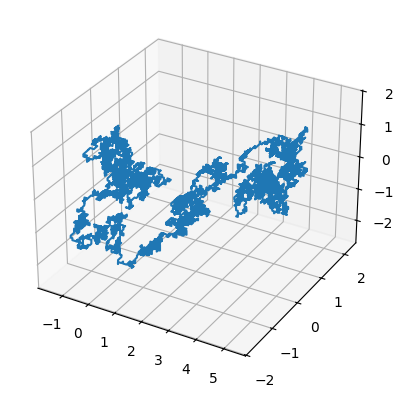

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x,y,z)
plt.show()

Modifique la caminata anterior de tal forma que solo le regrese la última posición.

In [7]:
x_final=x[-1]
y_final=y[-1]
z_final=z[-1]

print(x_final,y_final,z_final)

4.74341649025258 -0.442718872423573 1.011928851253881


*Simule* 1000 caminatas con este nuevo modelo de movimiento browniano y diga la probabilidad de que las partículas satisfagan $x>1$, $y>2$ y $z>0$.

In [10]:
delta_t = 0.001
N = 10000
num_simulations = 1000
caminata = np.sqrt(delta_t)

count = 0
for _ in range(num_simulations):
    dx = np.random.choice([-1, 1], N) * caminata
    dy = np.random.choice([-1, 1], N) * caminata
    dz = np.random.choice([-1, 1], N) * caminata
    x = np.cumsum(dx)
    y = np.cumsum(dy)
    z = np.cumsum(dz)

    if x[-1] > 1 and y[-1] > 2 and z[-1] > 0:
        count += 1

probabilidad = count / num_simulations
print("Probabilidad:", probabilidad)

Probabilidad: 0.045


#### 2. Apuesta arriesgada

Un jugador, con 20 pesos de capital inicial, decide apostar a un volado (con una moneda perfectamente nivelada) la mitad de su capital si éste es mayor o igual a 6 pesos, de lo contrario, solo 2. Esto es, el capital $C_i$ en cada volado $V_i$ se describe como
$$
C_{i+1}=C_i+V_iA_i
$$
donde la apuesta es
$$
A_i=\left\{\begin{array}{l}
C_i/2,\quad \mbox{si }C_i\geq 6\\
2,\quad \mbox{de lo contrario.}
\end{array}\right.
$$

1. Grafique la evolución del capital hasta quedar en cero.

In [16]:
def volado():
  if np.random.rand() < 0.5:
    return 1
  else:
    return -1
def apostar(capital):
  if capital >= 6:
    return capital / 2
  else:
    return 2

In [17]:
capital = 20
capitales = [capital]
while capital > 0:
  capital += apostar(capital) * volado()
  capitales.append(capital)

2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.

In [26]:
N = 10000
cuenta_volados = []
for i in range(N):
  capital = 20
  volados = 0
  while capital > 0:
    capital += apostar(capital) * volado()
    volados += 1
  cuenta_volados.append(volados)

volados_promedio = np.mean(cuenta_volados)
print(volados_promedio)

26.4196


3. Muestre un histograma del número de volados.

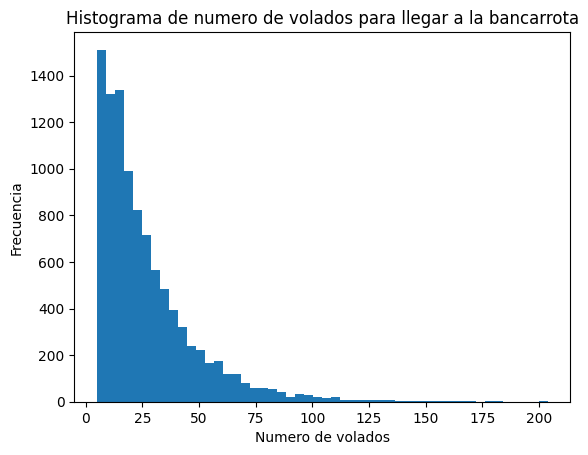

In [30]:
plt.hist(cuenta_volados, bins=50)
plt.xlabel("Numero de volados")
plt.ylabel("Frecuencia")
plt.title("Histograma de numero de volados para llegar a la bancarrota")
plt.show()